In [1]:
from sympy import *

In [2]:
r, R = symbols('r R', nonnegative=True)
phi, z = symbols('varphi z', real=True)

In [3]:
alpha = 0
beta = 2*atan(r / R)

In [4]:
n = Matrix([cos(alpha)*sin(beta), sin(alpha)*sin(beta), cos(beta)])

n

Matrix([
[sin(2*atan(r/R))],
[               0],
[cos(2*atan(r/R))]])

In [5]:
def div(n):
    return 1/r * (r * n[0]).diff(r) + 1/r * n[1].diff(phi) + n[2].diff(z)

def curl(n):
    return Matrix([1/r * n[2].diff(phi) - n[1].diff(z),
                   n[0].diff(z) - n[2].diff(r),
                   1/r * ((r*n[1]).diff(r) - n[0].diff(phi))])

def cross(m, n):
    return Matrix([m[1]*n[2] - m[2]*n[1],
                   m[2]*n[0] - m[0]*n[2],
                   m[0]*n[1] - m[1]*n[0]])

def dot(m, n):
    return m[0]*n[0] + m[1]*n[1] + m[2]*n[2]

def square(n):
    return dot(n, n)

In [6]:
splay = div(n)**2
bend = square(cross(n, curl(n)))
twist = dot(n, curl(n))**2

splay = simplify(splay)
bend = simplify(bend)
twist = simplify(twist)

In [7]:
splay

4*R**2*((R**2 - r**2)/(R**2 + r**2) + 1)**2/(R**2 + r**2)**2

In [8]:
print(latex(splay))

\frac{4 R^{2} \left(\frac{R^{2} - r^{2}}{R^{2} + r^{2}} + 1\right)^{2}}{\left(R^{2} + r^{2}\right)^{2}}


In [9]:
bend

16*R**4*r**2/(R**8 + 4*R**6*r**2 + 6*R**4*r**4 + 4*R**2*r**6 + r**8)

In [10]:
print(latex(bend))

\frac{16 R^{4} r^{2}}{R^{8} + 4 R^{6} r^{2} + 6 R^{4} r^{4} + 4 R^{2} r^{6} + r^{8}}


In [11]:
twist

0

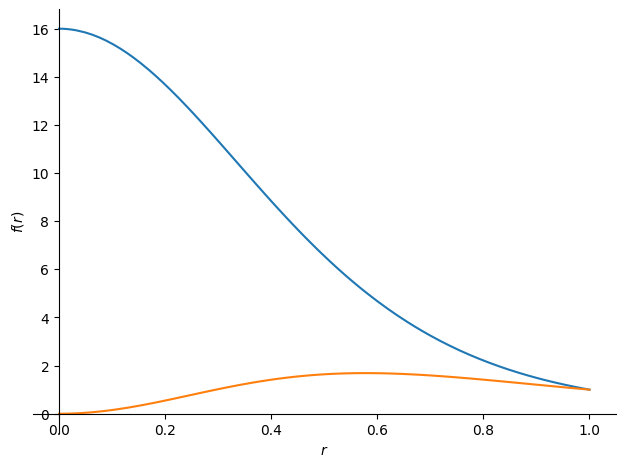

In [12]:
plotting.plot(splay.subs(R, 1), bend.subs(R, 1), (r, 0, 1))

In [13]:
display(simplify(splay.subs(R, 1)), simplify(bend.subs(R, 1)))

16/(r**2 + 1)**4

16*r**2/(r**8 + 4*r**6 + 6*r**4 + 4*r**2 + 1)

## Twisted disclination calculation

In [14]:
n = Matrix([1, phi / 2, 0])
n

Matrix([
[       1],
[varphi/2],
[       0]])

In [15]:
splay = div(n)**2
bend = square(cross(n, curl(n)))
twist = dot(n, curl(n))**2

splay = simplify(splay)
bend = simplify(bend)
twist = simplify(twist)

display(splay)
display(bend)
display(twist)

display(simplify(splay + twist + bend))

9/(4*r**2)

varphi**2*(varphi**2 + 4)/(16*r**2)

0

(varphi**2*(varphi**2 + 4) + 36)/(16*r**2)

In [16]:
curl(n)

Matrix([
[           0],
[           0],
[varphi/(2*r)]])

In [25]:
n_prime = R(pi / 2)*n

splay = div(n_prime)**2
bend = square(cross(n_prime, curl(n_prime)))
twist = dot(n_prime, curl(n_prime))**2

splay = simplify(splay)
bend = simplify(bend)
twist = simplify(twist)

display(splay)
display(bend)
display(twist)

display(simplify(splay + twist + bend))

cos(varphi/2)**2/r**2

0

1/(4*r**2)

(2*cos(varphi) + 3)/(4*r**2)

# Anisotropic twist calculation

In [32]:
beta = Function('beta')(r)
zeta = symbols('zeta')

In [33]:
n = Matrix([cos(phi)*sin(beta), sin(phi)*sin(beta), cos(beta)])

n

Matrix([
[sin(beta(r))*cos(varphi)],
[sin(varphi)*sin(beta(r))],
[            cos(beta(r))]])

In [34]:
splay = div(n)**2
bend = square(cross(n, curl(n)))
twist = dot(n, curl(n))**2

splay = simplify(splay)
bend = simplify(bend)
twist = simplify(twist)

In [35]:
splay

(r*cos(beta(r))*Derivative(beta(r), r) + 2*sin(beta(r)))**2*cos(varphi)**2/r**2

In [36]:
bend

(-r**2*sin(varphi)**2*Derivative(beta(r), r)**2 + r**2*Derivative(beta(r), r)**2 + 4*sin(varphi)**2*sin(beta(r))**2)*sin(beta(r))**2/r**2

In [37]:
twist

(r*Derivative(beta(r), r) + sin(2*beta(r)))**2*sin(varphi)**2/r**2

In [38]:
F = (1 - zeta) * splay + (1 + zeta) * twist + (1 - zeta) * bend

F = simplify(F)

In [39]:
F

((1 - zeta)*(r*cos(beta(r))*Derivative(beta(r), r) + 2*sin(beta(r)))**2*cos(varphi)**2 + (1 - zeta)*(-r**2*sin(varphi)**2*Derivative(beta(r), r)**2 + r**2*Derivative(beta(r), r)**2 + 4*sin(varphi)**2*sin(beta(r))**2)*sin(beta(r))**2 + (zeta + 1)*(r*Derivative(beta(r), r) + sin(2*beta(r)))**2*sin(varphi)**2)/r**2

In [41]:
F_line = simplify( F.subs(phi, 0) )

In [42]:
F_line

(1 - zeta)*(r**2*Derivative(beta(r), r)**2 + 2*r*sin(2*beta(r))*Derivative(beta(r), r) - 2*cos(2*beta(r)) + 2)/r**2

In [45]:
eom = simplify( F_line.diff(beta) - ( F_line.diff(beta.diff(r)) ).diff(r) )

In [46]:
eom

2*(zeta - 1)*(r**2*Derivative(beta(r), (r, 2)) - 3*sin(2*beta(r)))/r**2

In [49]:
simplify( eom.subs(beta, 2*atan(r/R)) )

2*(zeta - 1)*(-12*R*(R**2 - r**2)/(R**2 + r**2)**2 - 4*r**2/(R**3*(1 + r**2/R**2)**2))/r